In [1]:
import numpy as np
import matplotlib.pyplot as plt

from myula import *
from psgla import *
import distributions as pds
import potentials as pot

**Define target distribution**

In [2]:
mu = 5
b = 1
laplace_dist = pds.Laplace(d=1, mu=mu, b=b)

**Sample using PSGLA**

In [3]:
tau = 1
max_iter = np.max((100,np.round(10/tau)))
n_samples = 50000

sampler_psgla = PSGLA(max_iter, tau, x0 = mu*np.ones((1,n_samples)), pd = laplace_dist)
x_psgla = sampler_psgla.simulate()

**Using same constants, sample using MYULA**

In [4]:
gamma = 1/tau

sampler_myula = MYULA(max_iter, tau, gamma, x0 = mu*np.ones((1,n_samples)), pd = laplace_dist)
x_myula = sampler_myula.simulate()

**Compare samples**

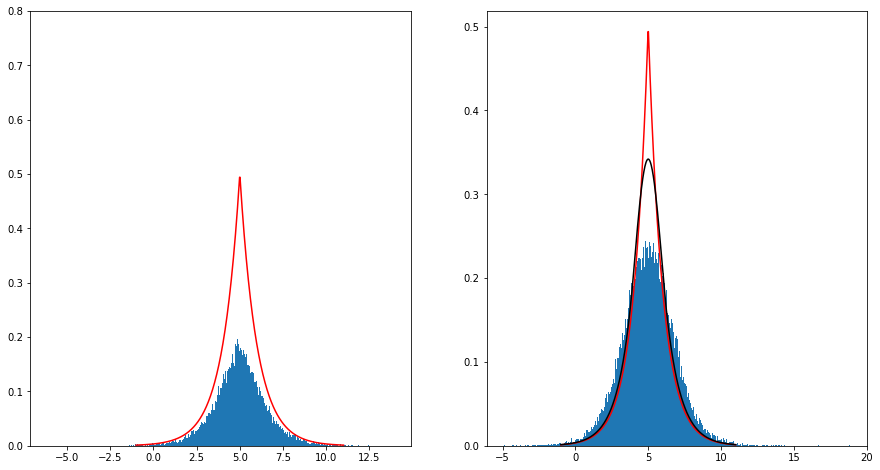

In [5]:
x_psgla = np.reshape(x_psgla, (-1,))
x_myula = np.reshape(x_myula, (-1,))

fig, ax = plt.subplots(1, 2, figsize=(15,8))
hist_psgla = ax[0].hist(x_psgla, 500, density=True)
hist_myula = ax[1].hist(x_myula, 500, density=True)

# compare histograms with the true density and the MY density
my_laplace_dist = pds.MY_Laplace1D(gamma=gamma, mu=mu, b=b)
t = np.reshape(np.linspace(mu-3*2*b**2,mu+3*2*b**2,500),(1,-1))
dens_vals = laplace_dist.pdf(t)
my_dens_vals = my_laplace_dist.pdf(t)

pdf_plot = ax[0].plot(np.reshape(t,(-1,)),np.reshape(dens_vals,(-1,)), color='r')
#xlims = ax[0].set_xlim(mu-3*2*b**2,mu+3*2*b**2)
ylims = ax[0].set_ylim(0,0.8)

pdf_plot = ax[1].plot(np.reshape(t,(-1,)),np.reshape(dens_vals,(-1,)), color='r')
my_pdf_plot = ax[1].plot(np.reshape(t,(-1,)),np.reshape(my_dens_vals,(-1,1)), color='k')
#xlims = ax[1].set_xlim(mu-3*2*b**2,mu+3*2*b**2)
#ylims = ax[1].set_ylim(0,0.8)